In [ ]:
#introducing libraries
!pip install numpy scipy pandas>1.0 matplotlib

In [ ]:
#calling up libraries
from datetime import datetime
import pandas as pd
import numpy as np
import scipy
import scipy.integrate as integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [ ]:
#import CSV data from drive
from google.colab import drive
import glob
import os
drive.mount('drive')
folder = "/content/drive/MyDrive/Lab 2 data"
all_files_AV = glob.glob(os.path.join(folder, '*.csv'))
AV_li = {}
titles = []
for filename in all_files_AV:
  #isolates
  new_name = filename.replace(".csv", "").replace("/content/drive/MyDrive/Lab 2 data/","")
  df = pd.read_csv(filename, header=7, usecols=['Reading','Value'])
  df.columns = ['Current(A)', 'Voltage(V)']
  AV_li[new_name] = df
  titles.append(new_name)



AV_li


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


{'lamp on broken 2cell':     Current(A)  Voltage(V)
 0    -1.713616   -0.099998
 1    -1.712845   -0.049987
 2    -1.712195    0.000045
 3    -1.713516    0.050007
 4    -1.710755    0.100012
 5    -1.711000    0.150010
 6    -1.709621    0.200013
 7    -1.708570    0.250010
 8    -1.708277    0.300006
 9    -1.704141    0.350011
 10   -1.699679    0.400007
 11   -1.692751    0.450000
 12   -1.678297    0.500001
 13   -1.659460    0.550031
 14   -1.629770    0.600032
 15   -1.584768    0.650031
 16   -1.524924    0.700016
 17   -1.442911    0.750017
 18   -1.339128    0.800010
 19   -1.214050    0.850005
 20   -1.064332    0.900004
 21   -0.889456    0.950000
 22   -0.685239    1.000001
 23   -0.449478    1.050026
 24   -0.184717    1.100023
 25    0.103717    1.150015
 26    0.411870    1.200007
 27    0.736918    1.250003
 28    1.074021    1.300005
 29    1.422011    1.349990
 30    1.778293    1.399982,
 'lamp on broken 2cell broken covered':     Current(A)  Voltage(V)
 0    -0.024

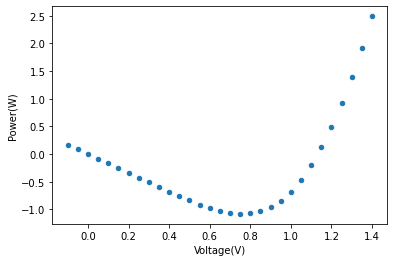

In [ ]:
#function testing
y = np.asarray(AV_li['lamp on broken 2cell']['Reading'])
x = np.asarray(AV_li['lamp on broken 2cell']['Value'])
x*y
PvsVdata = pd.DataFrame(np.stack((x, x*y), axis =-1), columns=('Voltage(V)', 'Power(W)'))
PvsVdata.plot.scatter(x=0, y=1)

In [ ]:
def get_vals(input_data):
  x=np.asarray(input_data['Voltage(V)'])
  y=np.asarray(input_data['Current(A)'])
    #changing mA/cm^2 to A/m^2
  
  #creates spline cubic interpolation function
  f = interp1d(x, y, 'cubic')
  #get zeroes from interpolation 
  Jsc = float(f(0))
  Voc = float(scipy.interpolate.InterpolatedUnivariateSpline(x, y).roots())
  #plot x*y vs x to get P vs V
  Pmax = min(x*y)
  FF = Pmax /(Jsc*Voc)
  #Irradiance from spectral data, assuming each of the 2 cells is (12.5cm)^2 and multiplying by 1000 W/m^2 for AM1.5
  PCE = -Pmax / 31.25
  return {'Name': name, 'Jsc':Jsc, 'Voc':Voc, 'Pmax':Pmax, 'FF':FF , 'PCE(%)':100*PCE}

In [ ]:
df = pd.DataFrame(columns = ['Name', 'Jsc', 'Voc', 'Pmax', 'FF', 'PCE(%)'])
for name in titles:
  df = df.append(get_vals(AV_li[name]), ignore_index=True)
df.sort_values('PCE(%)')

Name       Jsc  ...        FF    PCE(%)
4                roomlight broken 2cell -0.000606  ...  0.253777  0.000047
2                 roomlight other 2cell -0.000543  ...  0.254704  0.000048
10  phone light one side other two cell -0.004379  ...  0.241750  0.001691
0                 roomlight full module -0.001555  ...  0.273989  0.001762
9       phone light center other 2 cell -0.005938  ...  0.269383  0.003186
7     lamp on broken 2cell good covered -0.010957  ...  0.289291  0.008065
8      lamp on other 2cell half covered -0.013404  ...  0.333591  0.011875
6   lamp on broken 2cell broken covered -0.023452  ...  0.429248  0.028254
11          lamp on tented other 2 cell -0.429524  ...  0.738303  1.125234
5                  lamp on broken 2cell -1.712194  ...  0.558131  3.463064
3                   lamp on other 2cell -2.191420  ...  0.525977  4.110715
1                   lamp on full module -0.516476  ...  0.708460  6.106195

[12 rows x 6 columns]

('Data',
 129.02634946365194,
 -5.75475879742896,
 0.4845282743700664,
 -2.169515982071713,
 0.7780662960442538,
 3349.505742177166)

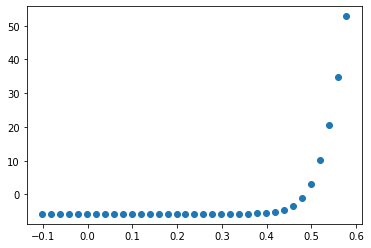

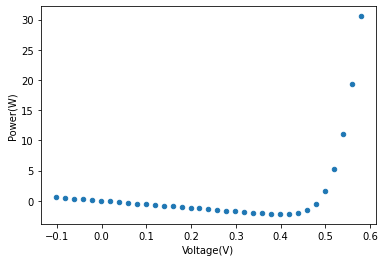

In [ ]:
#extra function for plotting graphs

plt.subplot(1,2,1)
  input_data.plot(kind='scatter', x = 'Voltage(V)', y='Current(A)' )
  plt.subplot(1,2,2)
  PvsVdata = pd.DataFrame(np.stack((x, x*y), axis =-1), columns=('Voltage(V)', 'Power(W)'))
  PvsVdata.plot.scatter(x=0, y=1)